# Data Preprocessing:

# Load Data

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\Mandar\Downloads\IRIS Flower.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data cleaning:

It is a method in data science which helps in preparing the data according to business need.

Handling Nan values: No need to Handling Nan value.

In [2]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

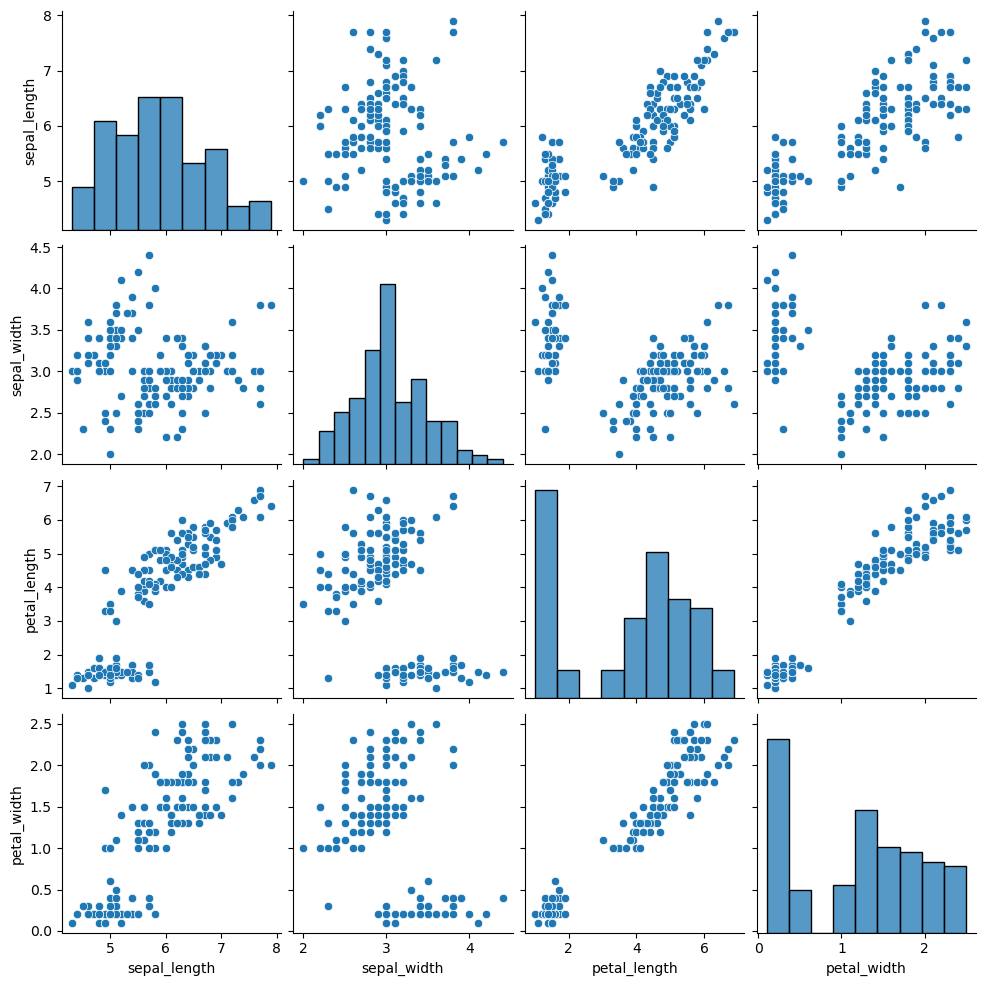

In [6]:
sns.pairplot(df)

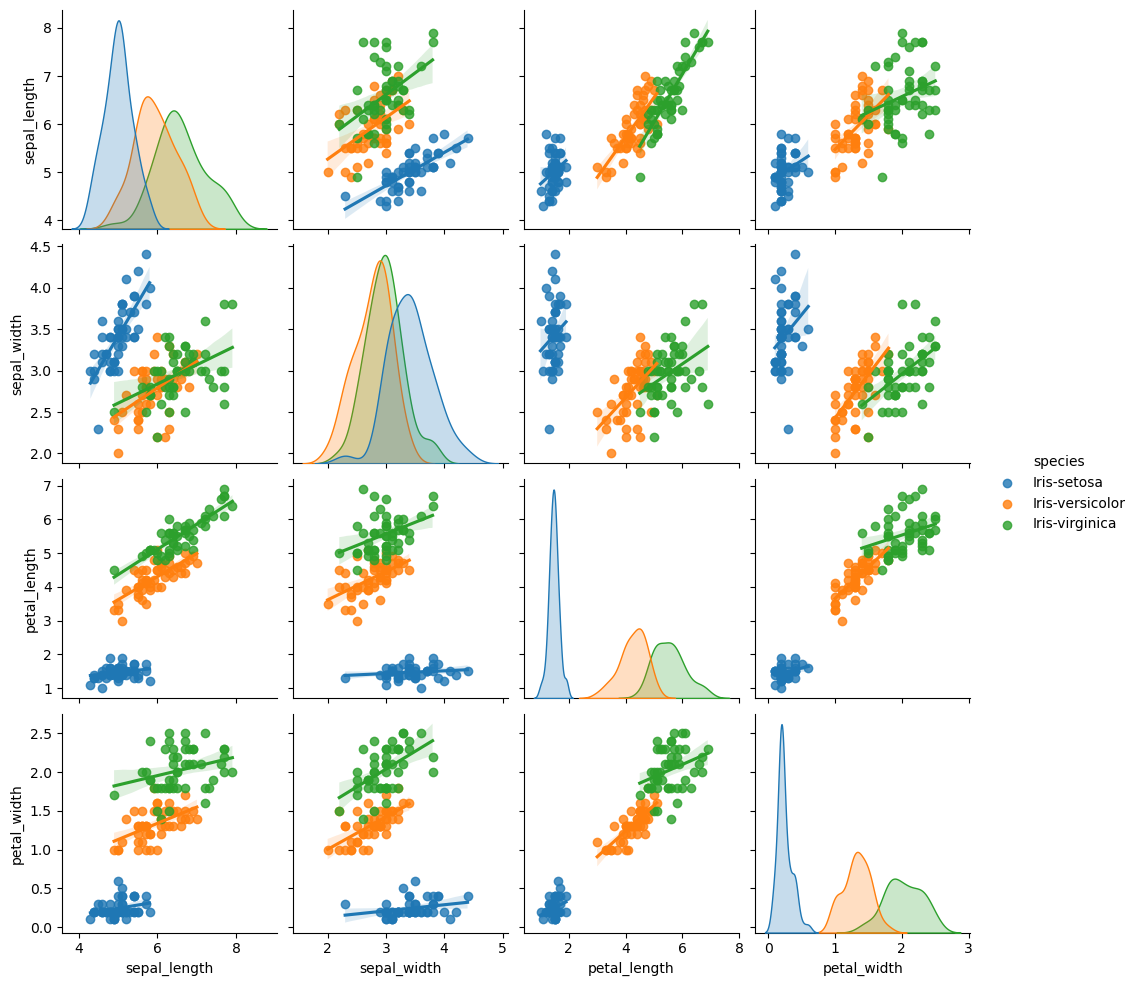

In [7]:
sns.pairplot(df,hue='species',kind="reg")

In [8]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

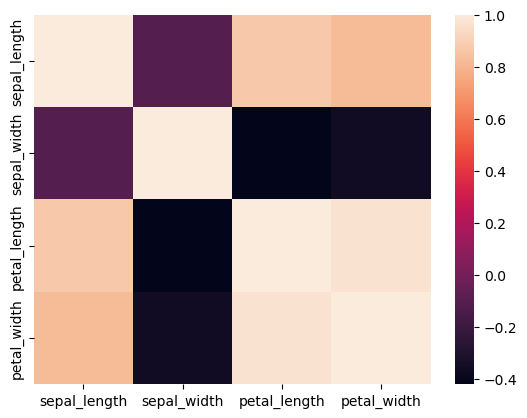

In [9]:
sns.heatmap(df.corr())

# Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode(df):
    for col in df.columns:
        if df[col].dtypes=="object":
            df[col]=le.fit_transform(df[col])
    return df
df=encode(df)

In [25]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Train Test Split method

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

# Model training

### SVM

In [28]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf",C=1.0)
svc.fit(x_train,y_train)

SVC()

In [40]:
print("Accuracy: ",svc.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
from sklearn.metrics import r2_score
print(f"The accuracy of the regression model is {r2_score(y_train,lr.predict(x_train))*100}%")
print(f"The accuracy of the regression model is {r2_score(y_test,lr.predict(x_test))*100}%")

The accuracy of the regression model is 92.71787258100636%
The accuracy of the regression model is 93.6638729906981%


### Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
def model_validation(x_train,x_test,y_train,y_test):
    rfc.fit(x_train,y_train)
    predicted_tr=rfc.predict(x_train)
    predicted_ts=rfc.predict(x_test)
    return f'''
    The accuracy of the model on the training data is {accuracy_score(y_train,predicted_tr)*100} %.
    The accuracy of the model on the testing data is {accuracy_score(y_test,predicted_ts)*100} %
    '''
model_validation(x_train,x_test,y_train,y_test)

'\n    The accuracy of the model on the training data is 100.0 %.\n    The accuracy of the model on the testing data is 97.77777777777777 %\n    '

# Prediction Model

In [41]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [45]:
def prediction(sepal_length=input("Enter sepal_length val:- "),
              sepal_width=input("Enter sepal_width val:- "),
              petal_length=input("Enter petal_length val:- "),
              petal_width=input("Enter petal_width val:- ")):
    list_of_data=[[sepal_length,sepal_width,petal_length,petal_width]]
    input_dataframe=pd.DataFrame(list_of_data,columns=list(df.columns)[0:-1])
    for col in input_dataframe.columns:
        if input_dataframe[col].dtypes=="object":
            input_dataframe[col]=le.fit_transform(input_dataframe[col])
    result=svc.predict(input_dataframe.values)
    print(result)
    if result[0]==0:
        return "The Spicies is Iris-setosa"
    elif result[0]==1:
        return "The Spicies is Iris-versicolor"
    else:
        return "The Spicies is Iris-virginica"
prediction()

Enter sepal_length val:- 2
Enter sepal_width val:- 3
Enter petal_length val:- 5
Enter petal_width val:- 1
[0]


C:\Users\Mandar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'The Spicies is Iris-setosa'